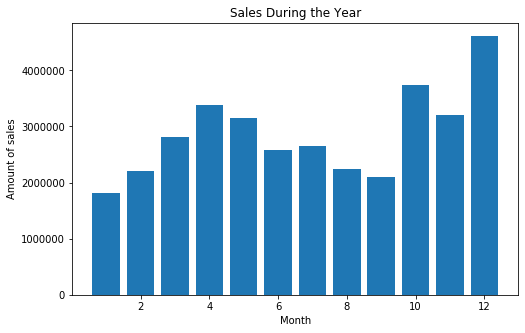

In [115]:
import pandas as pd
import os
import matplotlib.pyplot as plt


years=pd.DataFrame()
for file in os.listdir("SalesAnalysis/Sales_Data"):
    one=pd.read_csv("SalesAnalysis/Sales_Data/" + file)
    years=pd.concat([years, one])

#years.to_csv('Yearly Data', index=False)

years['Month']=years['Order Date'].str[:2]
years=years.dropna()


years=years.loc[years['Month'] != 'Or']
years['Month']=years['Month'].astype('int32')


years['Quantity Ordered']=years['Quantity Ordered'].astype('int32')
years['Price Each']=years['Price Each'].astype('float64')
years['Sales']=years['Quantity Ordered'] * years['Price Each']

months=range(1,13)
sales=years.groupby('Month').sum()
plt.figure(figsize=(8,5))
plt.bar(months, sales['Sales'])
plt.title('Sales During the Year')
plt.xlabel('Month')
plt.ylabel('Amount of sales')
plt.show()

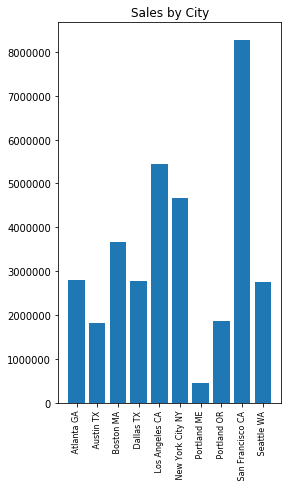

In [116]:
def get_state(address):
    stateandcode=address.split(',')[2]
    state=stateandcode.split(' ')[1]
    return state

years['Cities']=years['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + get_state(x)) #Lambda Function Used To Access Cell Contents

cities=years.groupby('Cities').sum()
cities_list=[city for city,df in years.groupby('Cities')] #Array of cities matches array in the dataframe

plt.figure(figsize=(4,7))
plt.bar(cities_list,  cities['Sales'])
plt.title('Sales by City')
plt.xticks(cities_list, rotation='vertical', fontsize=8)
plt.show()

In [118]:
years['Order Date']=pd.to_datetime(years['Order Date'])
years['Hours'] = years['Order Date'].dt.hour



In [120]:
years['Minutes']=years['Order Date'].dt.minute



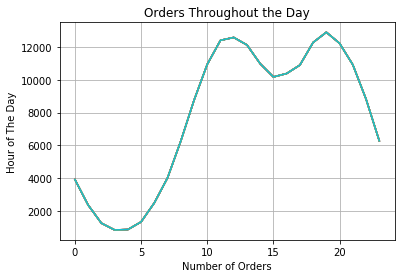

In [121]:
sales_per_hour=years.groupby(['Hours']).count()
hours=[hour for hour,df in years.groupby('Hours')]
plt.plot(hours, sales_per_hour)
plt.xlabel('Number of Orders')
plt.ylabel('Hour of The Day')
plt.title('Orders Throughout the Day')
plt.grid()
plt.show()



In [122]:
duplicatedrow=years[years['Order ID'].duplicated(keep=False)] #Get all the duplicated Order IDs
duplicatedrow['Grouped']=duplicatedrow.groupby (['Order ID'])['Product'].transform(lambda x: ','.join(x))
duplicatedrow.head()

C:\Users\milan\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hours,Minutes,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [28]:
duplicatedrow=duplicatedrow[['Order ID', 'Grouped']].drop_duplicates()
duplicatedrow.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [34]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicatedrow['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common():
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

('27in 4K Gaming Monitor', '27in FHD Monitor') 4
('Lightning Charging Cable', 'LG Washing Machine') 4
('27in FHD Monitor', 'ThinkPad Laptop') 4
('ThinkPad Laptop', 'Wired Headphones') 4
('iPhone', 'ThinkPad Laptop') 4
('Bose SoundSport Headphones', 'Macbook Pro Laptop') 4
('AAA Batteries (4-pack)', 'Vareebadd Phone') 4
('LG Washing Machine', 'AAA Batteries (4-pack)') 4
('Macbook Pro Laptop', 'ThinkPad Laptop') 3
('ThinkPad Laptop', 'Google Phone') 3
('34in Ultrawide Monitor', 'Macbook Pro Laptop') 3
('Lightning Charging Cable', 'Vareebadd Phone') 3
('Google Phone', 'ThinkPad Laptop') 3
('20in Monitor', '20in Monitor') 3
('ThinkPad Laptop', 'iPhone') 3
('Vareebadd Phone', 'Flatscreen TV') 3
('34in Ultrawide Monitor', 'Flatscreen TV') 3
('Macbook Pro Laptop', 'Macbook Pro Laptop') 3
('34in Ultrawide Monitor', 'ThinkPad Laptop') 3
('Macbook Pro Laptop', 'iPhone') 3
('Vareebadd Phone', 'iPhone') 3
('Wired Headphones', 'LG Washing Machine') 3
('Google Phone', '34in Ultrawide Monitor') 3
('M

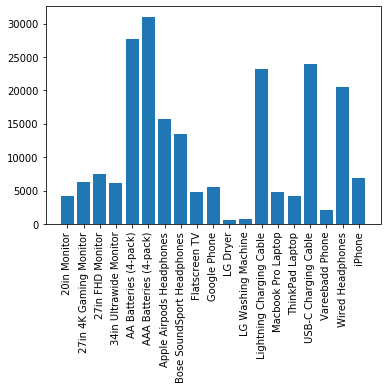

In [123]:
#What Product Sold the Most?
product=years.groupby(['Product']).sum()
quantity=product['Quantity Ordered']

product_list=[product for product,df in years.groupby(['Product'])]

plt.xticks(rotation='vertical')
plt.bar(product_list, quantity)
plt.show()








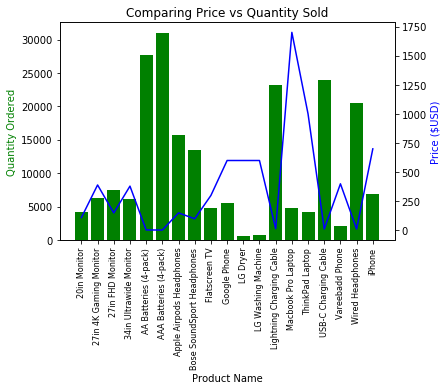

In [130]:

prices = years.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_list, quantity, color='g')
ax2.plot(product_list, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($USD)', color='b')
ax1.set_xticklabels(product_list, rotation='vertical', size=8)
plt.title('Comparing Price vs Quantity Sold')

fig.show()